# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
sns.set(style="darkgrid")
%matplotlib inline

# 2. Read the data as a data frame

In [2]:
dfbank = pd.read_csv("bank-full.csv")   
dfbank.head(6)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   
5   35    management  married   tertiary      no      231     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no

# 3. Perform basic EDA which should include the following and print out your insights at every step.

a. Shape of the data

In [7]:
dfbank.shape

(45211, 17)

b. Data type of each attribute

In [8]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
dfbank.groupby(["Target"]).count() 

age    job  marital  education  default  balance  housing   loan  \
Target                                                                       
no      39922  39922    39922      39922    39922    39922    39922  39922   
yes      5289   5289     5289       5289     5289     5289     5289   5289   

        contact    day  month  duration  campaign  pdays  previous  poutcome  
Target                                                                        
no        39922  39922  39922     39922     39922  39922     39922     39922  
yes        5289   5289   5289      5289      5289   5289      5289      5289

The dataset is a biased dataset, because the binary outcome ratio have significant differences.

c. Checking the presence of missing values

In [15]:
    dfbank.isnull().values.any()

False

d. 5 point summary of numerical attributes

In [3]:
dfbank.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

1. In Balance,pdays mean and Median have major difference, so there is skewness in the data. It leads to long tails.

e. Checking the presence of outliers

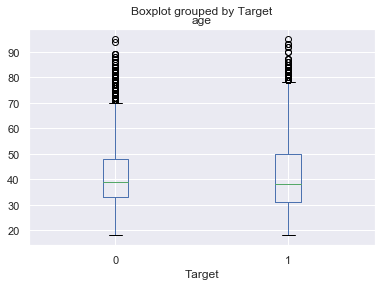

In [29]:
dfbank.boxplot(column="age", by="marital")

There are significant outliers in Age attribute.

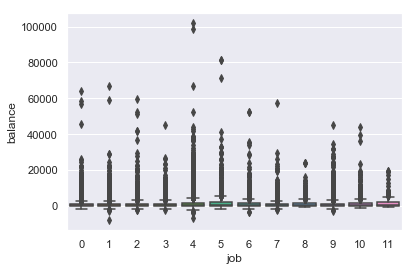

In [5]:
#sns.boxplot(x='job',y='balance', data = dfbank)

#There are many outliars in balance data.
#Mangement Jobs customer data have more out liars complaren to other type of customers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C070C358>,
      dtype=object)

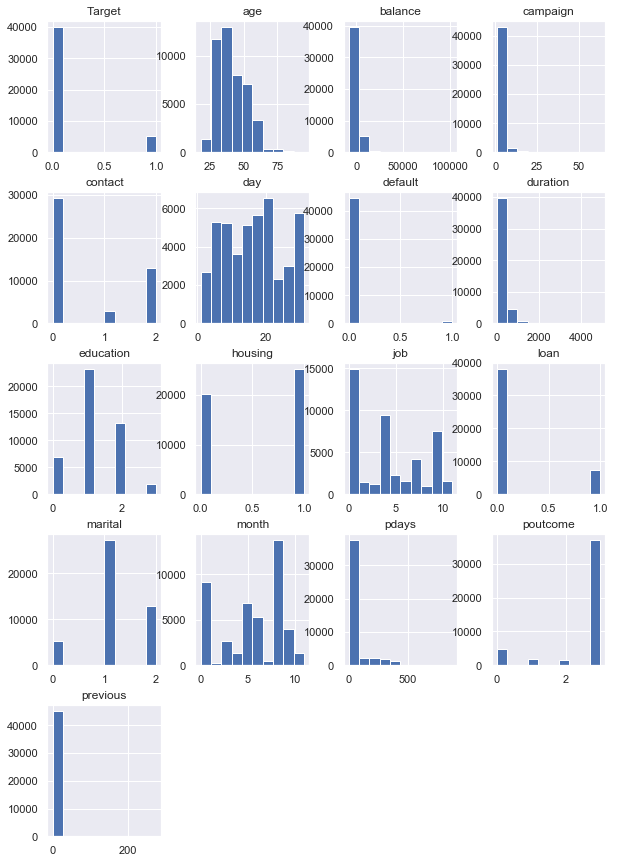

In [41]:
dfbank.hist(figsize=(10,15))

#Target outcome is biased
#Most Customer Aged between 30 to 50 and educated maximum in Secondary.
#Contct have many missing values
#Many customer have not been contacted by bank for more than 8 months.

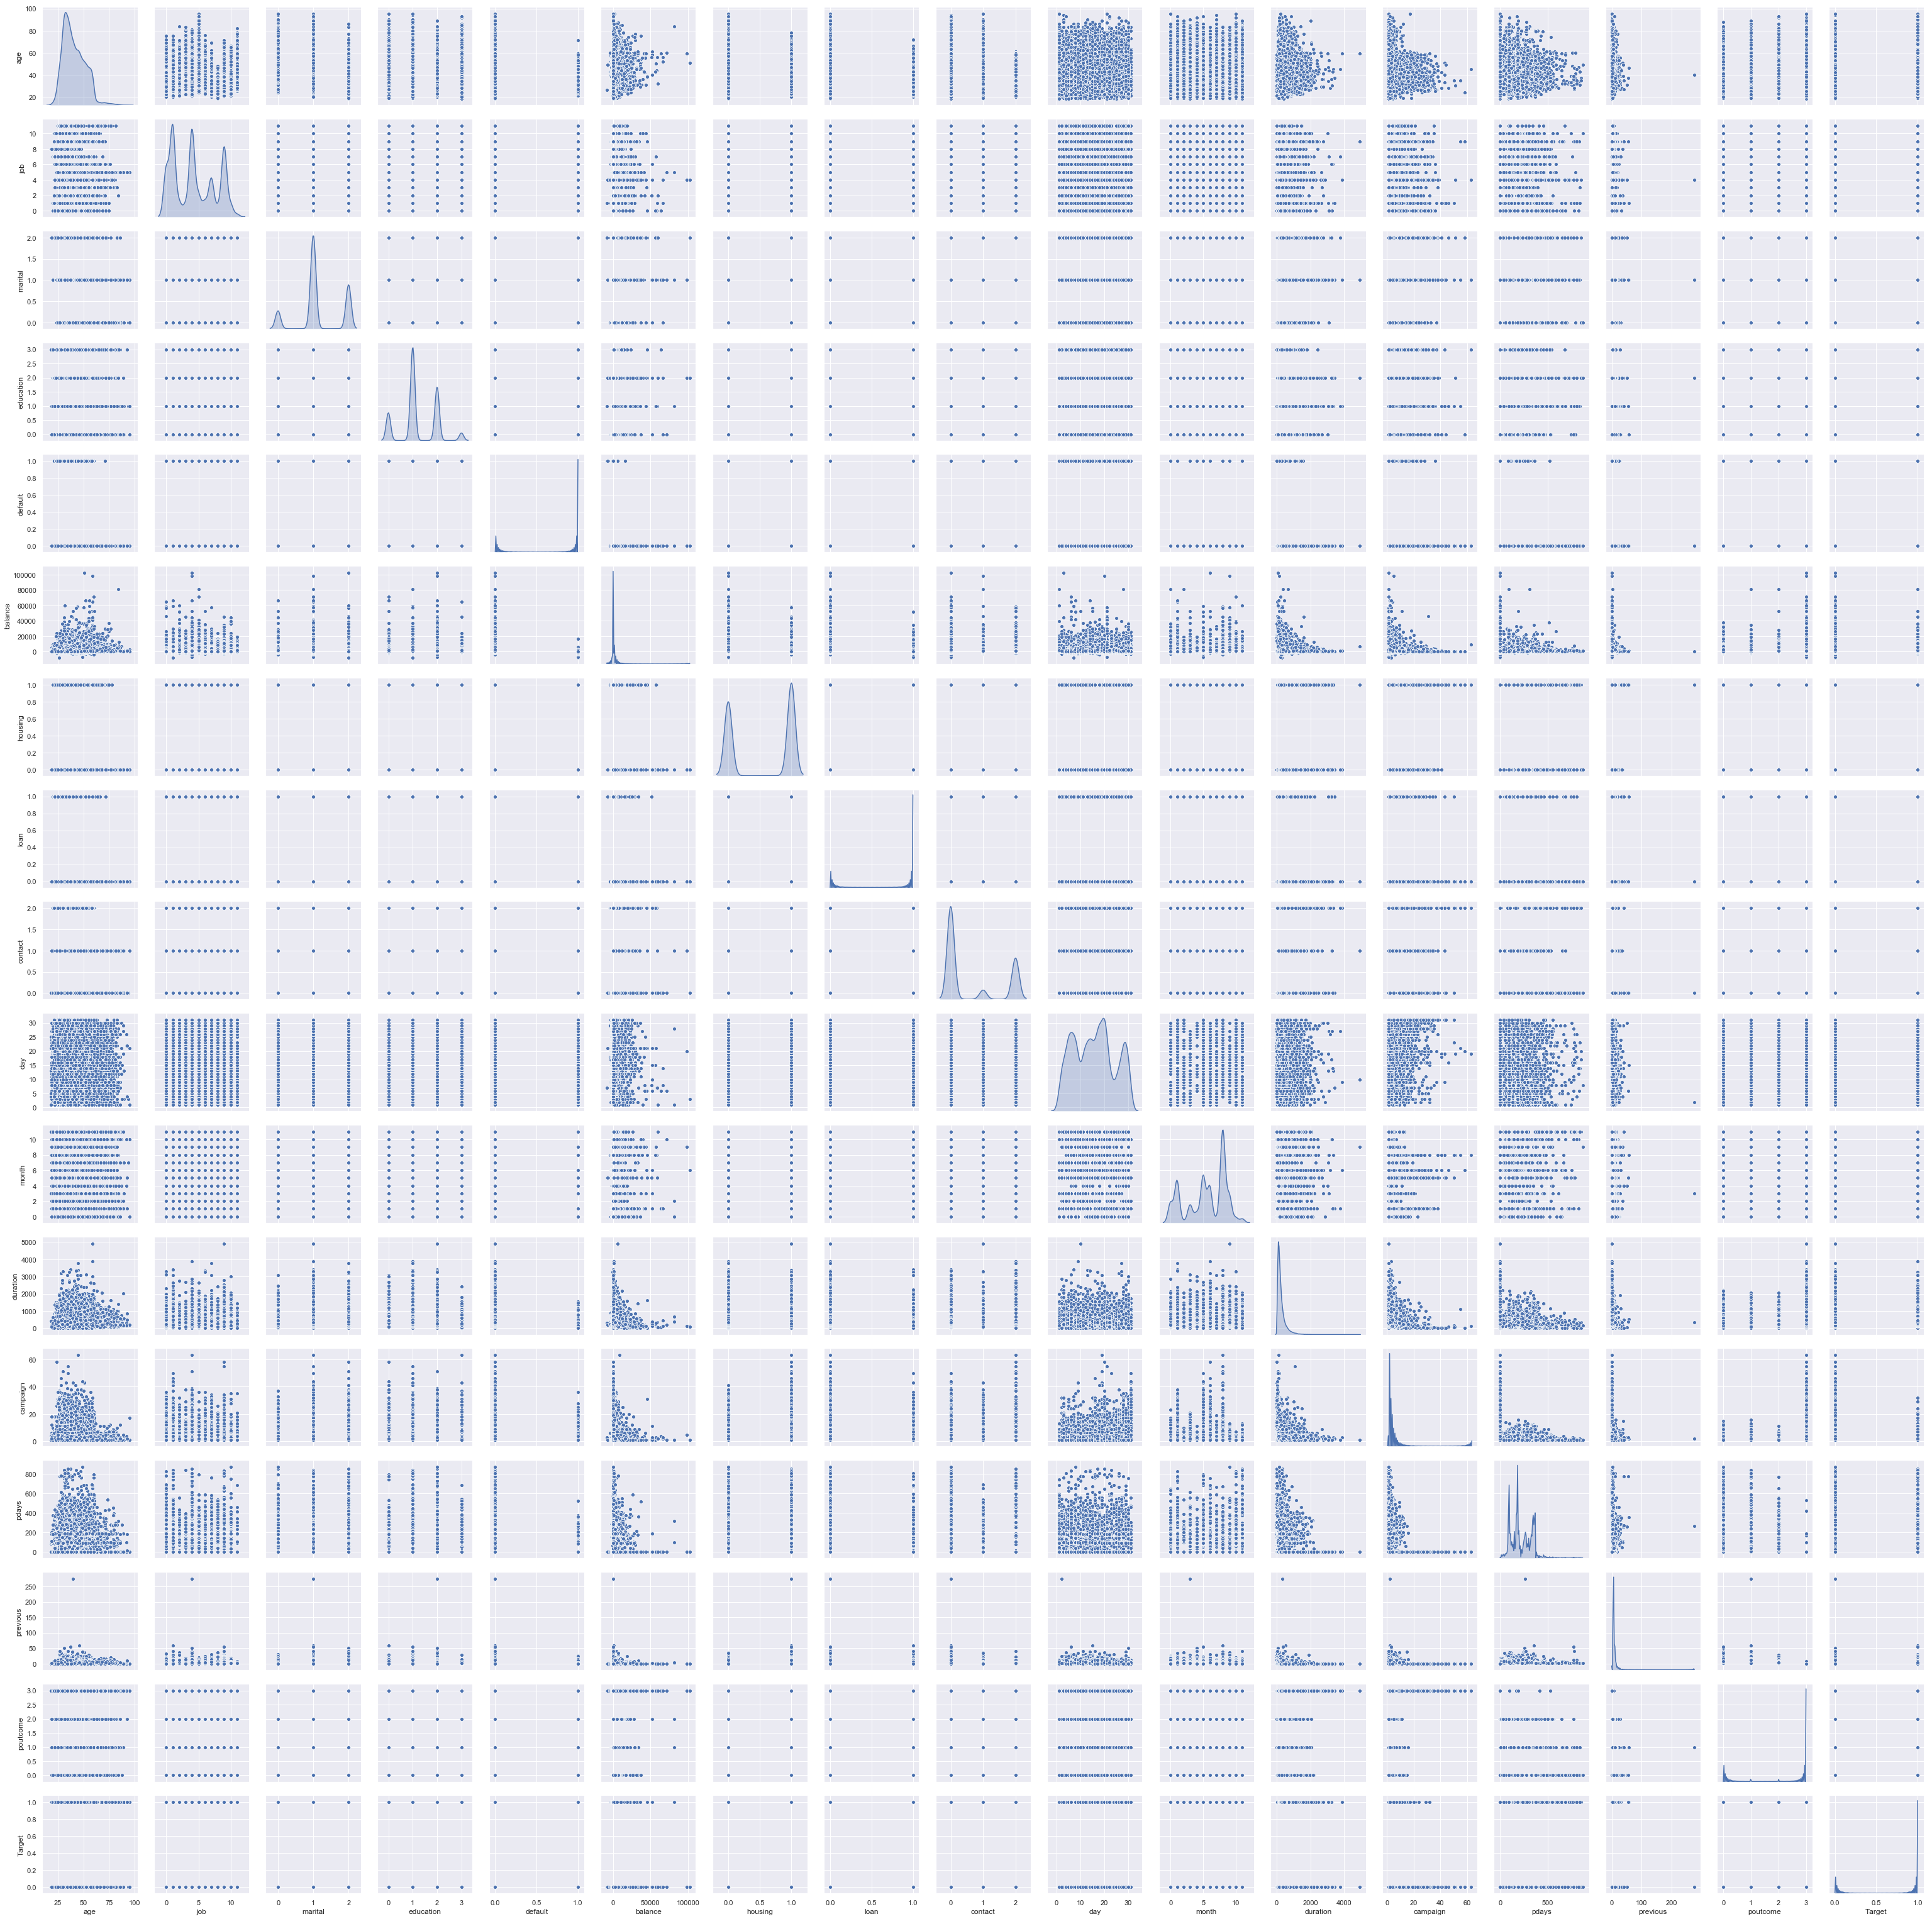

In [51]:
sns.pairplot(dfbank, diag_kind='kde')

# 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [4]:
for feature in dfbank.columns:
    if dfbank[feature].dtype == 'object':
        dfbank[feature]= pd.Categorical(dfbank[feature]).codes

In [5]:
dfbank.head(10)

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8       261         1     -1         0         3       0  
1    5      8       151         1     -1         0         3       0  
2    5      8        76         1     -1         0         3       0  
3    5      8        92         1     -1         0         3       0  
4    5      8       198         1     -1         0         3       0  
5    5      8       139         1     -1         0         3       0  
6    5      8       217         1     -1         0         3       0  
7    5      8       380         1     -1         0         3       0  
8    5      8        50         1     -1         0         3       0  
9    5      8        55         1     -1         0         3       0

In [16]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
dtypes: int64(7), int8(9)
memory usage: 2.8 MB


In [6]:
train_char_label = ['No', 'Yes']

In [7]:
X = dfbank.drop("Target" , axis=1)

y = dfbank.pop("Target")


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

# 5. Train a few standard classification algorithms, note and comment on their performances along different metrics.

# Decision Tree

In [9]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [10]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.088882
job        0.046870
marital    0.014512
education  0.023813
default    0.000779
balance    0.108834
housing    0.028200
loan       0.011553
contact    0.053124
day        0.083682
month      0.101327
duration   0.306765
campaign   0.031644
pdays      0.059217
previous   0.014638
poutcome   0.026160


In [12]:
y_predict = dt_model.predict(X_test)

## Model evaluation

In [13]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8754792096726629


## The confusion matrix

In [70]:
# make predictions
expected = y_test
predicted = y_predict
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.47      0.48      0.48      1551

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.88      0.88     13564

[[11172   841]
 [  805   746]]


## Decision Tree - Pictorial

In [9]:
from IPython.display import Image  
from sklearn import tree
from os import system


In [15]:
Campg_Tree_File = open('D:/Campg_Tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Campg_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Campg_Tree_File.close()

In [16]:
system("dot -Tpng D:\Campg_Tree.dot -o D:/Campg_Tree.png")

0

In [19]:
Image("D:\Campg_Tree.png")

# Regularising the Decision Tree

In [10]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
y_predict_reg = reg_dt_model.predict(X_test)

## Model evaluation

In [80]:
print(reg_dt_model.score(X_train , y_train))
print(reg_dt_model.score(X_test , y_test))

0.91402028628306
0.9009879091713359


In [81]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.032572
job        0.005004
marital    0.000458
education  0.001880
default    0.000000
balance    0.016128
housing    0.053905
loan       0.003131
contact    0.115343
day        0.029641
month      0.113452
duration   0.497931
campaign   0.008206
pdays      0.075764
previous   0.009623
poutcome   0.036961


## The confusion matrix

In [84]:
# make predictions
expected = y_test
predicted = y_predict_reg
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12013
           1       0.59      0.45      0.51      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.76      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564

[[11526   487]
 [  854   697]]


## Regularized Decision Tree - Pictorial

In [12]:
Campg_Tree_RegFile = open('D:/Campg_RegTree.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Campg_Tree_RegFile, feature_names = list(X_train), class_names = list(train_char_label))

Campg_Tree_RegFile.close()

In [13]:
system("dot -Tpng D:\Campg_RegTree.dot -o D:/Campg_RegTree.png")

0

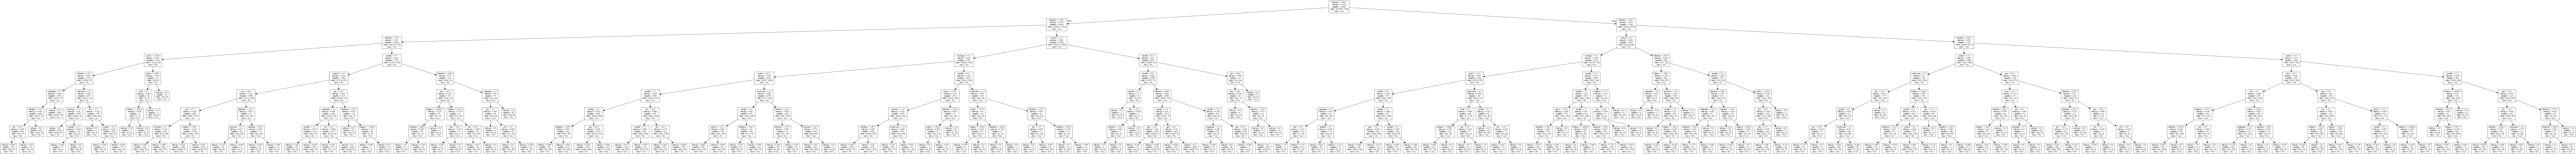

In [14]:
Image("D:\Campg_RegTree.png")

# Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
model_NB = GaussianNB()


In [9]:
model_NB.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

## Model evaluation

In [10]:
print(model_NB.score(X_train, y_train))
print(model_NB.score(X_test, y_test))

0.8391316712484596
0.841049837805957


## The confusion matrix

In [11]:
# make predictions
expected = y_test
predicted = model_NB.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.35      0.45      0.39      1551

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.64      0.67      0.65     13564
weighted avg       0.86      0.84      0.85     13564

[[10707  1306]
 [  850   701]]


# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [14]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

## Model evaluation

In [15]:
print(NNH.score(X_train, y_train))
print(NNH.score(X_test, y_test))

1.0
0.8828516661751695


## The confusion matrix

In [16]:
# make predictions
expected = y_test
predicted = NNH.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     12013
           1       0.48      0.29      0.36      1551

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.62      0.65     13564
weighted avg       0.86      0.88      0.87     13564

[[11531   482]
 [ 1107   444]]


# 6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees.

# Ensemble Learning - Bagging

In [20]:
dfbank_labels = dfbank.pop("Target")

In [21]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(dfbank, dfbank_labels)
print(bgcl.oob_score_)

0.9016389816637544


In [24]:
y_predict_bgcl = bgcl.predict(X_test)

## Model evaluation

In [25]:
print(bgcl.score(X_train , y_train))
print(bgcl.score(X_test , y_test))

0.9939330742250451
0.9938808611029195


## The confusion matrix

In [26]:
# make predictions
expected = y_test
predicted = y_predict_bgcl
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12013
           1       0.99      0.95      0.97      1551

   micro avg       0.99      0.99      0.99     13564
   macro avg       0.99      0.98      0.98     13564
weighted avg       0.99      0.99      0.99     13564

[[12005     8]
 [   75  1476]]


# Ensemble Learning - AdaBoosting

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)

abcl = abcl.fit(X_train, y_train)

In [92]:
y_predict_abcl = abcl.predict(X_test)

## Model evaluation

In [93]:
print(abcl.score(X_train , y_train))
print(abcl.score(X_test , y_test))

1.0
0.8754054851076378


## The confusion matrix

In [94]:
# make predictions
expected = y_test
predicted = y_predict_abcl
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12013
           1       0.46      0.48      0.47      1551

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564

[[11125   888]
 [  802   749]]


In [95]:
print (pd.DataFrame(abcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.087716
job        0.043320
marital    0.014456
education  0.022543
default    0.000922
balance    0.106816
housing    0.027994
loan       0.010747
contact    0.053601
day        0.088621
month      0.100822
duration   0.309130
campaign   0.035256
pdays      0.057617
previous   0.013164
poutcome   0.027277


# Ensemble Learning - GradientBoost

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

In [98]:
y_predict_gbcl = gbcl.predict(X_test)

## Model evaluation

In [99]:
print(gbcl.score(X_train , y_train))
print(gbcl.score(X_test , y_test))

0.9049830947641166
0.9004718372161604


## The confusion matrix

In [100]:
# make predictions
expected = y_test
predicted = y_predict_gbcl
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.63      0.32      0.42      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

[[11716   297]
 [ 1053   498]]


In [101]:
print (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.045891
job        0.000000
marital    0.003851
education  0.003206
default    0.000000
balance    0.006886
housing    0.055115
loan       0.003728
contact    0.051263
day        0.010349
month      0.090190
duration   0.541795
campaign   0.004983
pdays      0.086616
previous   0.007951
poutcome   0.088177


# Ensemble RandomForest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [108]:
y_predict_rfcl = rfcl.predict(X_test)

## Model evaluation

In [109]:
print(rfcl.score(X_train , y_train))
print(rfcl.score(X_test , y_test))

0.9997788099977881
0.9054113830728399


## The confusion matrix

In [110]:
# make predictions
expected = y_test
predicted = y_predict_rfcl
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.63      0.41      0.50      1551

   micro avg       0.91      0.91      0.91     13564
   macro avg       0.78      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564

[[11638   375]
 [  908   643]]


In [111]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                Imp
age        0.104431
job        0.049870
marital    0.021707
education  0.027645
default    0.001628
balance    0.109273
housing    0.026470
loan       0.009712
contact    0.020536
day        0.090811
month      0.087106
duration   0.293114
campaign   0.038713
pdays      0.048146
previous   0.018083
poutcome   0.052753


# 7. Compare performances of all the models

#Decision Tree initially performed overfit in train and underperformance in Test, after regularization it performed better on train test with 91.4 & 90.1
#Naive Bayes outcomes are generalized in train and test but when comparing other models it os less.
#KNN performed overfit in train and underperformance in Test.

#Ensemble Methods Ada Boosting performed overfit in train and underperformance in Test.
#Gradient Boost outcomes are generalized in train and test but its precsion on binary outcome is less and biased.
#Random Forest are less generalized in train and test and also its precsion on binary outcome is less and biased.

#Ensemble Type -Bagging Performed generalized in train and test (99.39 , 99.38) and with good precision on both binary out comes Yes, No as (0.99, 0.99)